# Working with text

In this problem, we will load movie reviews from IMDB, a famous movie database and website, and we will try to predict whether the review is positive or negative.

First, the function we will use to diagnose the performance of our model

In [1]:
%pylab inline
plt.style.use('seaborn-talk')

Populating the interactive namespace from numpy and matplotlib


In [0]:
def plot_metric(history, metric):
    history_dict = history.history
    values = history_dict[metric]
    if 'val_' + metric in history_dict.keys():  
        val_values = history_dict['val_' + metric]

    epochs = range(1, len(values) + 1)

    if 'val_' + metric in history_dict.keys():  
        plt.plot(epochs, val_values, label='Validation')
    plt.semilogy(epochs, values, label='Training')

    if 'val_' + metric in history_dict.keys():  
        plt.title('Training and validation %s' % metric)
    else:
        plt.title('Training %s' % metric)
    plt.xlabel('Epochs')
    plt.ylabel(metric.capitalize())
    plt.legend()
    plt.grid()

    plt.show()  

## Input data

In [3]:
from keras.datasets import imdb

Using TensorFlow backend.


In [4]:
# Run this to download the data prior to the lecture
train, test = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 9s 0us/step


In [6]:
type(train)

tuple

In [0]:
train_text, train_labels = train
test_text, test_labels = test

In [11]:
train_text[4][0:10]

[1, 249, 1323, 7, 61, 113, 10, 10, 13, 1637]

In [12]:
train_labels[4]

0

Why are these *texts* numbers?

These are actually indices in a word index

In [13]:
word_index = imdb.get_word_index()

1646592/1641221 [==============================] - 1s 1us/step


In [14]:
word_index['car']

516

In [0]:
reversed_word_index = dict((value, key) for (key, value) in word_index.items())

In [0]:
def get_text_from_vector(v):
    return ' '.join(reversed_word_index.get(i-3, '?') for i in v)

In [17]:
get_text_from_vector(train_text[4][0:10])

'? worst mistake of my life br br i picked'

### Prepare data for the network

We need to prepare the data to be an input to the neural network. The input must be a **tensor**. In our case, all vectors should be of the same length. But not all reviews are of the same size, so the vectors will have different sizes. How can we overcome this problem?

* We can zero-pad the vectors, so all of them have the same size, and then combine them in a tensor. We would need to add an *Embedding* layer to learn **word embeddings** (more later)
* Or we can use 1-HOT encoding

In both cases, we will have vectors of size $10^4$ (the maximum number of words). Let's go with the 1-HOT encoding.

In [0]:
from keras.preprocessing import text

In [25]:
len(train_text[2])

141

In [28]:
len(test_text[456])

63

In [0]:
tokenizer = text.Tokenizer(num_words=10000)

In [0]:
train_text_m = tokenizer.sequences_to_matrix(train_text, mode='binary')

In [32]:
train_text_m.shape

(25000, 10000)

In [33]:
train_text_m[0][0:25]

array([0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 0., 0.])

In [34]:
train_labels.shape

(25000,)

In [35]:
train_labels[0:10]

array([1, 0, 0, 1, 0, 0, 1, 0, 1, 0])

In [0]:
test_text_m = tokenizer.sequences_to_matrix(test_text, mode='binary')

**EXERCISE 1**. Can you see any problem with this approach? How would you solve it?

**EXERCISE 2**. Do we need to transform the labels? Why? Or why not?

## Let's build the model

In [0]:
from keras import models
from keras import layers

In [0]:
m1hot = models.Sequential()
m1hot.add(layers.Dense(256, activation='relu', input_shape=(10000,)))
m1hot.add(layers.Dense(128, activation='relu'))
m1hot.add(layers.Dense(64, activation='relu'))
m1hot.add(layers.Dense(1, activation='sigmoid'))

In [41]:
m1hot.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               2560256   
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 2,601,473
Trainable params: 2,601,473
Non-trainable params: 0
_________________________________________________________________


In [0]:
from keras import optimizers
from keras import losses
from keras import metrics

In [0]:
m1hot.compile(
    optimizer=optimizers.rmsprop(),
    loss=losses.binary_crossentropy,
    metrics=[metrics.binary_accuracy]
)

In [44]:
h = m1hot.fit(train_text_m, train_labels, epochs=20, batch_size=1024,
             validation_split=.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/20
20000/20000 [==============================] - 3s 143us/step - loss: 0.5741 - binary_accuracy: 0.7293 - val_loss: 0.4608 - val_binary_accuracy: 0.7776
Epoch 2/20
20000/20000 [==============================] - 2s 83us/step - loss: 0.3128 - binary_accuracy: 0.8744 - val_loss: 0.3061 - val_binary_accuracy: 0.8754
Epoch 3/20
20000/20000 [==============================] - 2s 85us/step - loss: 0.2222 - binary_accuracy: 0.9104 - val_loss: 0.2829 - val_binary_accuracy: 0.8900
Epoch 4/20
20000/20000 [==============================] - 2s 86us/step - loss: 0.1780 - binary_accuracy: 0.9305 - val_loss: 0.2697 - val_binary_accuracy: 0.8928
Epoch 5/20
20000/20000 [==============================] - 2s 86us/step - loss: 0.1249 - binary_accuracy: 0.9539 - val_loss: 0.3212 - val_binary_accuracy: 0.8904
Epoch 6/20
20000/20000 [==============================] - 2s 87us/step - loss: 0.1201 - binary_accuracy: 0.9609 - val_loss: 0.3072 - val_binary_a

# Analyze performance

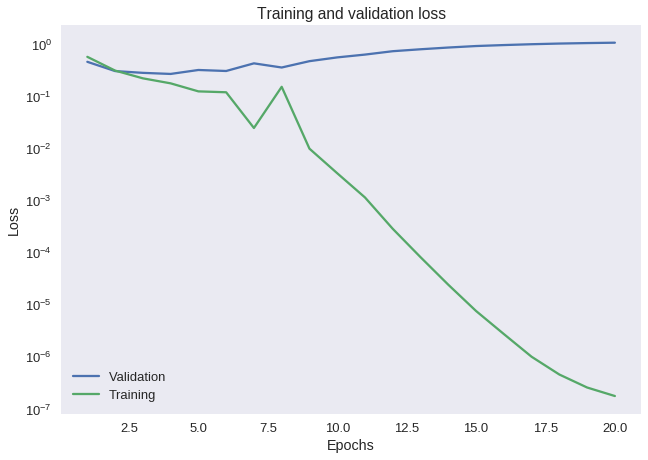

In [45]:
plot_metric(h, 'loss')

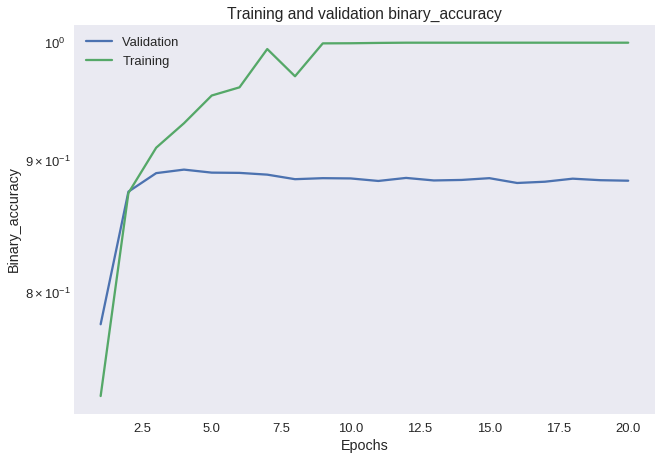

In [46]:
plot_metric(h, 'binary_accuracy')

We cannot find a satisfactory model with what we have learned so far. Is there any way to have a better representation of text that can provide better results?

In [47]:
m1hot.evaluate(test_text_m, test_labels, batch_size=1024)

25000/25000 [==============================] - 2s 64us/step


[1.163825847644806, 0.8748799996566773]

# Word embeddings

Using 1-HOT encoded vectors produce large and sparse tensors, that are difficult to learn from using a neural network. Word embeddings are compact vectors, representing words in a vector space. These vectors are learnt in a neural network, with a layer of type *Embedding*. We can also even use pre-trained word embeddings, to improve our model

![](./imgs/07_embeddings.png)

To generate  an embedding, we need to tokenize the text, transforming words into indices, and then we use these lists of numbers to produce the vectorial representation:

![](./imgs/08_embeddings.png)

More info:
* http://www.offconvex.org/2015/12/12/word-embeddings-1/
* http://www.offconvex.org/2016/02/14/word-embeddings-2/

## Input data for word embeddings

In [48]:
train_text.shape

(25000,)

In [49]:
train_labels.shape

(25000,)

In [50]:
train_text[4][0:10]

[1, 249, 1323, 7, 61, 113, 10, 10, 13, 1637]

In [0]:
max_len = 100
embedding_dim = 32
max_words = 10000

In [0]:
from keras.preprocessing import sequence

In [0]:
train_text_p = sequence.pad_sequences(train_text, maxlen=max_len)
test_text_p = sequence.pad_sequences(test_text, maxlen=max_len)

In [55]:
train_text_p.shape

(25000, 100)

## Let's build the model with embeddings

In [0]:
m2emb = models.Sequential()
m2emb.add(layers.Embedding(max_words, embedding_dim))
m2emb.add(layers.LSTM(32, return_sequences=True))
m2emb.add(layers.LSTM(16))
m2emb.add(layers.Dense(1, activation='sigmoid'))

In [115]:
m2emb.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_18 (Embedding)     (None, None, 32)          320000    
_________________________________________________________________
lstm_16 (LSTM)               (None, None, 32)          8320      
_________________________________________________________________
lstm_17 (LSTM)               (None, 16)                3136      
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 17        
Total params: 331,473
Trainable params: 331,473
Non-trainable params: 0
_________________________________________________________________


In [0]:
m2emb.compile(
    optimizer=optimizers.rmsprop(),
    loss=losses.binary_crossentropy,
    metrics=[metrics.binary_accuracy]
)

In [118]:
h = m2emb.fit(train_text_p, train_labels, epochs=10, batch_size=1024,
             validation_split=.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 13s 671us/step - loss: 0.6575 - binary_accuracy: 0.6138 - val_loss: 0.5398 - val_binary_accuracy: 0.7772
Epoch 2/10
20000/20000 [==============================] - 10s 497us/step - loss: 0.4833 - binary_accuracy: 0.8009 - val_loss: 0.4525 - val_binary_accuracy: 0.8068
Epoch 3/10
20000/20000 [==============================] - 10s 497us/step - loss: 0.3942 - binary_accuracy: 0.8488 - val_loss: 0.4693 - val_binary_accuracy: 0.8028
Epoch 4/10
20000/20000 [==============================] - 10s 497us/step - loss: 0.3490 - binary_accuracy: 0.8674 - val_loss: 0.4025 - val_binary_accuracy: 0.8236
Epoch 5/10
20000/20000 [==============================] - 10s 497us/step - loss: 0.3077 - binary_accuracy: 0.8882 - val_loss: 0.4211 - val_binary_accuracy: 0.8270
Epoch 6/10
20000/20000 [==============================] - 10s 497us/step - loss: 0.2876 - binary_accuracy: 0.8973 - val_loss: 0.3958 - v

## Analyze performance

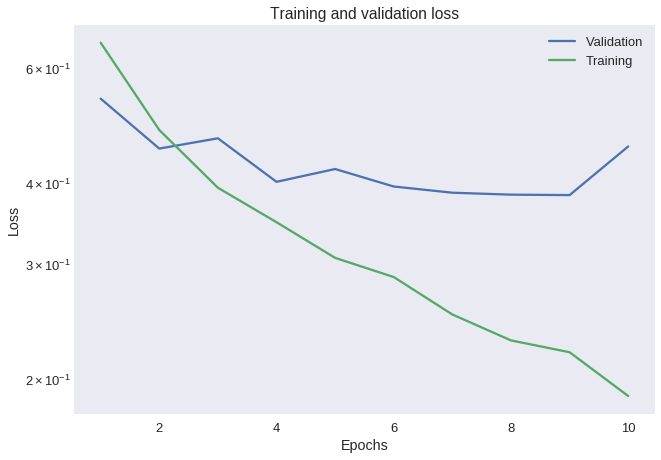

In [119]:
plot_metric(h, 'loss')

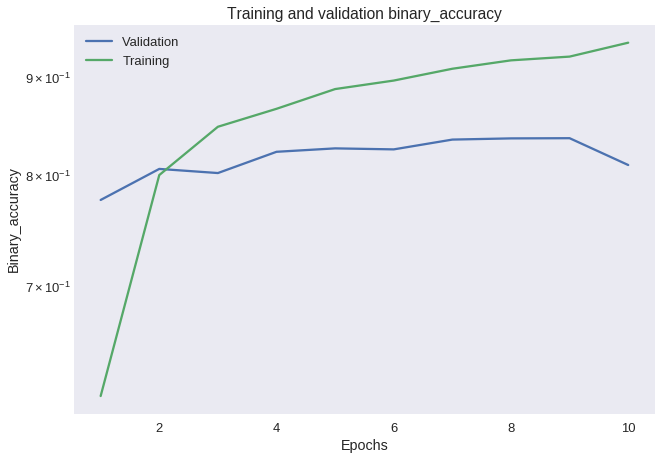

In [120]:
plot_metric(h, 'binary_accuracy')

Not bad, with just an embedding layer, we get $75\%$ accuracy

In [122]:
loss, acc = m2emb.evaluate(test_text_p, test_labels, batch_size=1024)

25000/25000 [==============================] - 3s 116us/step


In [123]:
acc

0.8048400002098084

How many reviews will be misclassified?

In [124]:
(1-acc)*test_text.shape[0]

4878.99999475479

Let's check some of the predictions

In [0]:
# N = 123
N = 2344

In [133]:
m2emb.predict(test_text_p[N:N+1])[0][0]

0.04262688

In [134]:
test_labels[N]

0

In [135]:
get_text_from_vector(test_text[N])

"? there is a reason ? of the board got a 2 which is too high this movie flat out is one of the worse movies of all time and i seen my share of rotten films ? of the board stars two of the most annoying actors people today ? top and ? ? smith ? top just isn't funny anymore and wasn't in this piece of trash ? ? smith isn't any better just watch according to jim and you will see a prime example of what i am talking about ? of the board got a 1 from me because that is low as you can go it is that bad i am a little shocked that this piece of junk isn't on the imdb bottom 100 somewhere i would put this in the top 5 on that list but its slowly working its way there"

So this prediction is correct. It says the review is negative. Let's have a look at the text:

In [0]:
get_text_from_vector(test_text[N])

"? if you believe that any given war movie can make you really feel the war you need to see called the ? are flying in english it tells the story of ? ? and boris who are in love on the verge of wwii they are walking along the ? watching the ? fly by when the war starts boris is promptly sent off to war ? hides out with a family and ends up marrying the son whom she does not love boris meanwhile continues ? through the countryside fighting the nazis and experiencing all the horrors of war until he he runs out of energy when ? working in a military hospital receives this news she refuses to accept it until ? body arrives home on one of the trains simultaneously the radio ? that germany has ? and the allied powers have won the war the soviet union lost 27 million citizens but it's the start of a new era br br this movie did a very good job showing the human impact of the war not only in the battlefield but also how it affected the ? population this is definitely a movie that everyone sho

Can we find all the reviews that are wrongly classified?

In [0]:
get_text_from_vector(test_text[3])

"? i generally love this type of movie however this time i found myself wanting to kick the screen since i can't do that i will just complain about it this was absolutely idiotic the things that happen with the dead kids are very cool but the alive people are absolute idiots i am a grown man pretty big and i can defend myself well however i would not do half the stuff the little girl does in this movie also the mother in this movie is reckless with her children to the point of neglect i wish i wasn't so angry about her and her actions because i would have otherwise enjoyed the flick what a number she was take my advise and fast forward through everything you see her do until the end also is anyone else getting sick of watching movies that are filmed so dark anymore one can hardly see what is being filmed as an audience we are ? involved with the actions on the screen so then why the hell can't we have night vision"

Is the classifier symmetric?

**EXERCISE** Can you construct the confusion matrix for this model? Can you calculate the precision and recall? How does it compare to accuracy?
* See https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/

**EXERCISE (more complex)** Keras decided some time ago to remove precision, recall and F1-score from the list of available metrics. Was it a good decision? Why? Why did the Keras' authors did not remove accuracy too?
* https://github.com/keras-team/keras/issues/5794
* https://github.com/keras-team/keras/issues/4592

**EXERCISE** What is the ROC curve? Could you build the ROC curve for this model? How would you use a ROC curve to evaluate a classifier?
* https://en.wikipedia.org/wiki/Receiver_operating_characteristic
* Help: https://stackoverflow.com/questions/25009284/how-to-plot-roc-curve-in-python

In [0]:
from sklearn import metrics

In [0]:
preds1 = m1hot.predict(test_text_m)
preds2 = m2emb.predict(test_text_p)

In [0]:
c1 = metrics.roc_curve(test_labels, preds1)
c2 = metrics.roc_curve(test_labels, preds2)

In [0]:
fpr1, tpr1, _ = c1
fpr2, tpr2, _ = c2

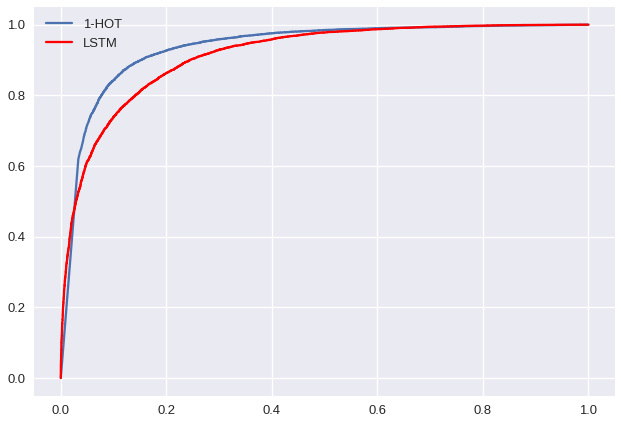

In [149]:
plt.plot(fpr1, tpr1, label='1-HOT')
plt.plot(fpr2, tpr2, 'r', label='LSTM')
plt.legend()

Let's analyze wrong positives and wrong negatives separately. Then we will try to find a relationship between the words and the misclassification, both for false positives and negatives.

Now let's compare with the words of the true positives

So the most common words are very similar. Not surprising. Let's calculate the relative frequency of each word, and then find what are the words with the highest difference in relative frequency.

We see words such as *great*, *best*, *excellent*, which have a large difference between the true and the false positives. So false positives seem to lack some extreme words, and the classifier is having a hard time trying to assign a category to those reviews.